In [22]:
print("Hello, World")

Hello, World


In [23]:
import pandas
import seaborn
import matplotlib as plt

In [24]:
data=pandas.read_csv("/Users/home/Desktop/CCIR-laptimes.csv")

In [25]:
data

,ID,Session,Track,Intervention,Lap,Sector 1,Sector 2,Sector 3,Sector 4,Time
0,1,1,A,No,1,28.796,25.188,33.714,NaN,1:27.698
1,1,1,A,No,2,27.284,23.714,33.370,NaN,1:24.369
2,1,1,A,No,3,27.083,30.476,34.329,NaN,1:31.889
3,1,2,B,Yes,1,24.082,28.415,14.998,14.876,1:22.373
4,1,2,B,Yes,2,23.952,27.873,14.943,14.852,1:21.621
5,1,2,B,Yes,3,30.139,27.964,14.787,14.953,1:27.844
6,2,1,B,Yes,1,23.917,27.496,14.849,14.804,1:21.067
7,2,1,B,Yes,2,23.617,27.419,14.494,14.773,1:20.306
8,2,1,B,Yes,3,23.559,27.202,14.479,14.812,1:20.055
9,2,2,A,No,1,28.220,23.831,31.849,NaN,1:23.901


# Broken Plot

In [26]:
# Function to convert time string to total seconds 
def time_to_seconds(time_str): 
    minute, sec_millisec = time_str.split(':') 
    seconds, milliseconds = sec_millisec.split('.') 
    total_seconds = int(minute) * 60 + int(seconds) + float(milliseconds) / 1000 
    return total_seconds 
# Apply the function to the 'time' column 
data['time_in_seconds'] = data['Time'].apply(time_to_seconds)
data

data['Lap']=data['Lap'].astype(int)
mapping = {"Yes":"-", "No":"--"}

# Creating the plot 
plt.figure(figsize=(10, 6)) 

# Plotting the data points for each participant 
participants = data['ID'].unique() 
for participant in participants: 
    participant_data = data[data['ID'] == participant] 
    for i,row in participant_data.iterrows():
        linestyle = mapping[row["Intervention"]]
        plt.plot(participant_data['Lap'], participant_data['time_in_seconds'], 'o', label=participant, linestyle = linestyle)

    
# Adding labels and title
plt.xlabel('Lap Number') 
plt.ylabel('Lap Time (seconds)') 
plt.title('Lap Times for Each Participant') 
plt.legend(title='Participant') 

# Show the plot 
plt.show()

TypeError: 'module' object is not callable

# Working Plot

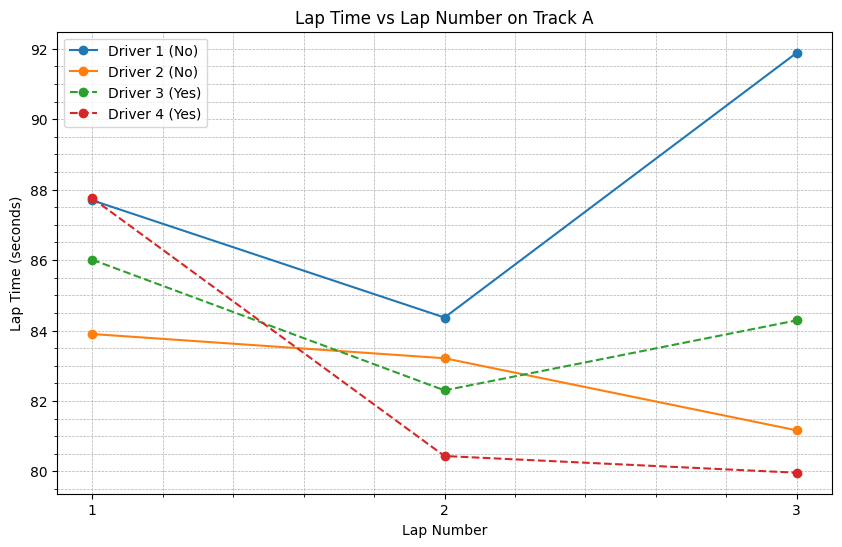

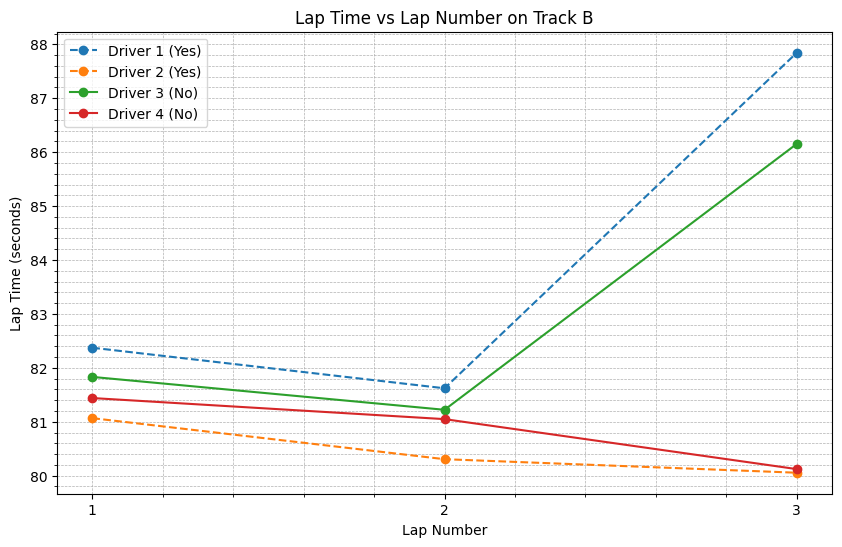

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/Users/home/desktop/CCIR-laptimes.csv'
df = pd.read_csv(file_path)

# Convert the 'Time' column to seconds
def time_to_seconds(time_str):
    min_sec = time_str.split(':')
    return int(min_sec[0]) * 60 + float(min_sec[1])

df['Time_seconds'] = df['Time'].apply(time_to_seconds)

# Plotting function
def plot_track(df, track):
    plt.figure(figsize=(10, 6))
    for driver_id in df['ID'].unique():
        driver_data = df[(df['ID'] == driver_id) & (df['Track'] == track)]
        line_style = '--' if driver_data['Intervention'].iloc[0] == 'Yes' else '-'
        plt.plot(driver_data['Lap'], driver_data['Time_seconds'], marker='o', linestyle=line_style, label=f'Driver {driver_id} ({driver_data["Intervention"].iloc[0]})')
    
    plt.title(f'Lap Time vs Lap Number on Track {track}')
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time (seconds)')
    plt.xticks(range(1, max(df['Lap']) + 1))
    plt.minorticks_on()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Plot for Track A
plot_track(df, 'A')

# Plot for Track B
plot_track(df, 'B')
